# Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.feature_selection import SelectFromModel

In [2]:
data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')

# Data Exploration

## Dataset Description

There are 21 attributes and their descriptions are given below.

Files
train.csv - the training set
test.csv - the test set
sample_submission.csv - a sample submission file in the correct format

Columns
The first six columns represent the different pages in the e-commerce website visited by a user from other sites.

*   HomePage: Number of times visited this page

*   HomePage_Duration: Total number of duration spent on this page.

*   LandingPage: Number of times visited this page

*   LandingPage_Duration: Total number of duration spent on this page.

*   ProductDesriptionPage Number of times visited this page

*   ProductDescriptionPage_Duration: Total number of duration spent on this page.

*   GoogleMetric-Bounce Rate: Whenever a user comes to any one web-page of the website and he/she does not go to any other page and exits from the website from the same page, then this activity done by the user is called Bounce. And the percentage of the total number of times the user visiting our website and bounce it, is called Bounce Rate

*   GoogleMetric-Exit Rate: The bounce rate is calculated based on the user exiting a website after visiting one page. But some users exit from the second, third, fourth, or any other page of our website, then those visitors’ data help determine the exit rate. The percentage of the total number of times the user to our website who do not exit from the first page (Landing Page) but exit after exploring other website pages is called the Exit Rate.

*   GoogleMetric-Page Value: Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction.

*   SeasonalPurchase: It is a weight indicator to track the seasonal purchase. If a user makes a purchase during any seasonal time (Mother’s Day, Diwali, Valentine's Day), we will assign based on internal heuristic.

*   Month_ SeasonalPurchase: Month of the special day considered for seasonal purchase.

The other attributes like, OS, Search Engine, Zone, Type of Traffic, Customer Type, Gender, Cookies Setting, Education, Marital Status and Weekend Purchase are self-explanatory variables

As mentioned above there are 21 attributes (and one target variable) in the dataset. In total, there are 21,330 examples as well

In [3]:
data.shape

(14731, 22)

In [4]:
data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


The target variable has a boolean value (True or False). Hence, this is a classification problem

In [5]:
data['Made_Purchase'].value_counts()

False    9065
True     5666
Name: Made_Purchase, dtype: int64

Let's look at the details of features and the target variable

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

We observe that:


1.   There are 14,731 entries/rows and 22 columns in the dataset
1.   Apart from the Target Variable i.e. 'Made_Purchase', all the other features contain missing values
2.   'Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status' are categorical features
2.   All the other features are numerical encoded as floating point numbers



In [7]:
for i in data.columns:
  print(data[i].value_counts())
  print("---------------"*5)

0.0     6977
1.0     1580
2.0     1264
3.0     1114
4.0      882
5.0      700
6.0      485
7.0      385
8.0      303
9.0      252
10.0     180
11.0     111
12.0     101
13.0      60
14.0      56
15.0      41
16.0      22
17.0      20
18.0      14
19.0       7
22.0       7
23.0       6
24.0       3
21.0       3
20.0       3
27.0       1
26.0       1
Name: HomePage, dtype: int64
---------------------------------------------------------------------------
0.000000      7130
4.000000        76
5.000000        62
11.000000       55
6.000000        49
              ... 
405.550000       1
101.851111       1
218.966667       1
291.235714       1
168.700000       1
Name: HomePage_Duration, Length: 2844, dtype: int64
---------------------------------------------------------------------------
0.0     11525
1.0      1206
2.0       859
3.0       452
4.0       239
5.0       119
6.0        89
7.0        40
8.0        13
9.0        12
10.0        9
12.0        5
13.0        4
14.0        2
16.0       

In [8]:
cat_shown_as_num = ['OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'WeekendPurchase']

## Numerical Features Exploration

Let's look at the distribution of these features and target by plotting their histograms

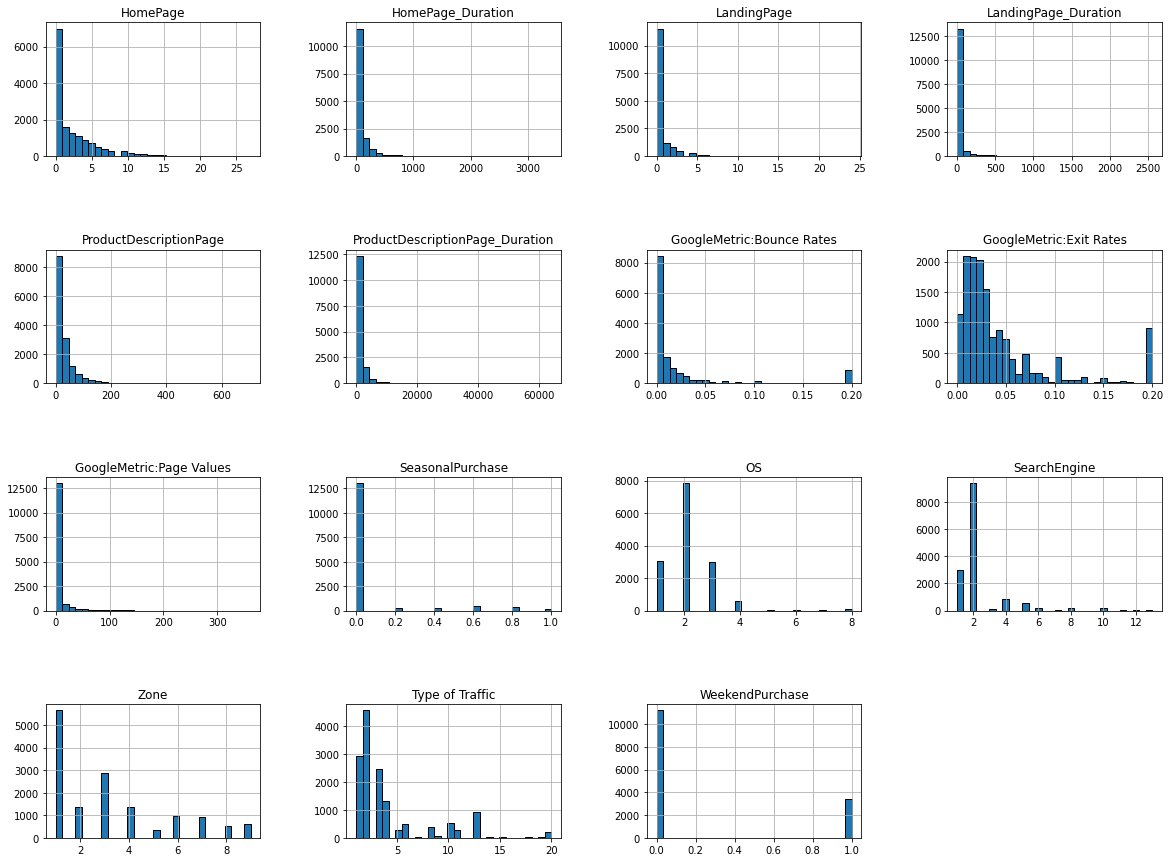

In [9]:
data.hist(figsize=(20,15), bins=30, edgecolor='black')
plt.subplots_adjust(hspace=0.7, wspace=0.4) 

Observations:


1.   All the numerical features except 'WeekendPurchase' appear to follow a similar distribution with a long tail on right
1.   'GoogleMetric:Bounce Rates' and 'GoogleMetric:Exit Rates' have some spikes on their right tail. Relevant outlier handling should be performed
2.   'OS', 'SearchEngine', 'Zone', 'Type of Traffic' and 'WeekendPurchase' look like a categorical feature encoded as a numerical feature as all of them have integer values and their interpretation would make more sense if they are categorical

Let's look at some statistics of these features and target variables

In [10]:
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


Almost every feature has significant differences on the upper (max value and 75th percentile value) and/or lower (min value and 25th percentile value) sides of the dataset

<AxesSubplot:>

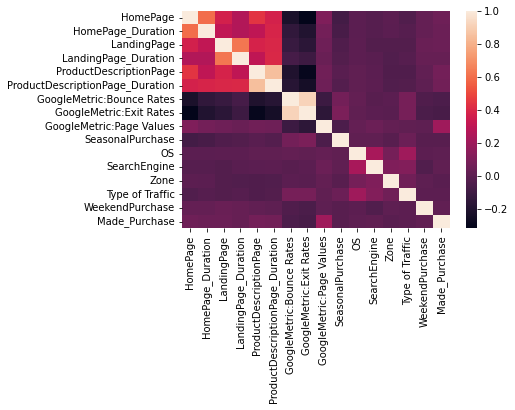

In [11]:
sns.heatmap(data.corr())

A high positive correlation is observed between GoogleMetric Bounce Rates and Exit Rates which makes sense when you refer their definition

In [12]:
num_cols = data.select_dtypes('float64').columns #Numerical Columns of the dataset
cat_cols = data.select_dtypes('object').columns #Categorical Columns of the dataset 

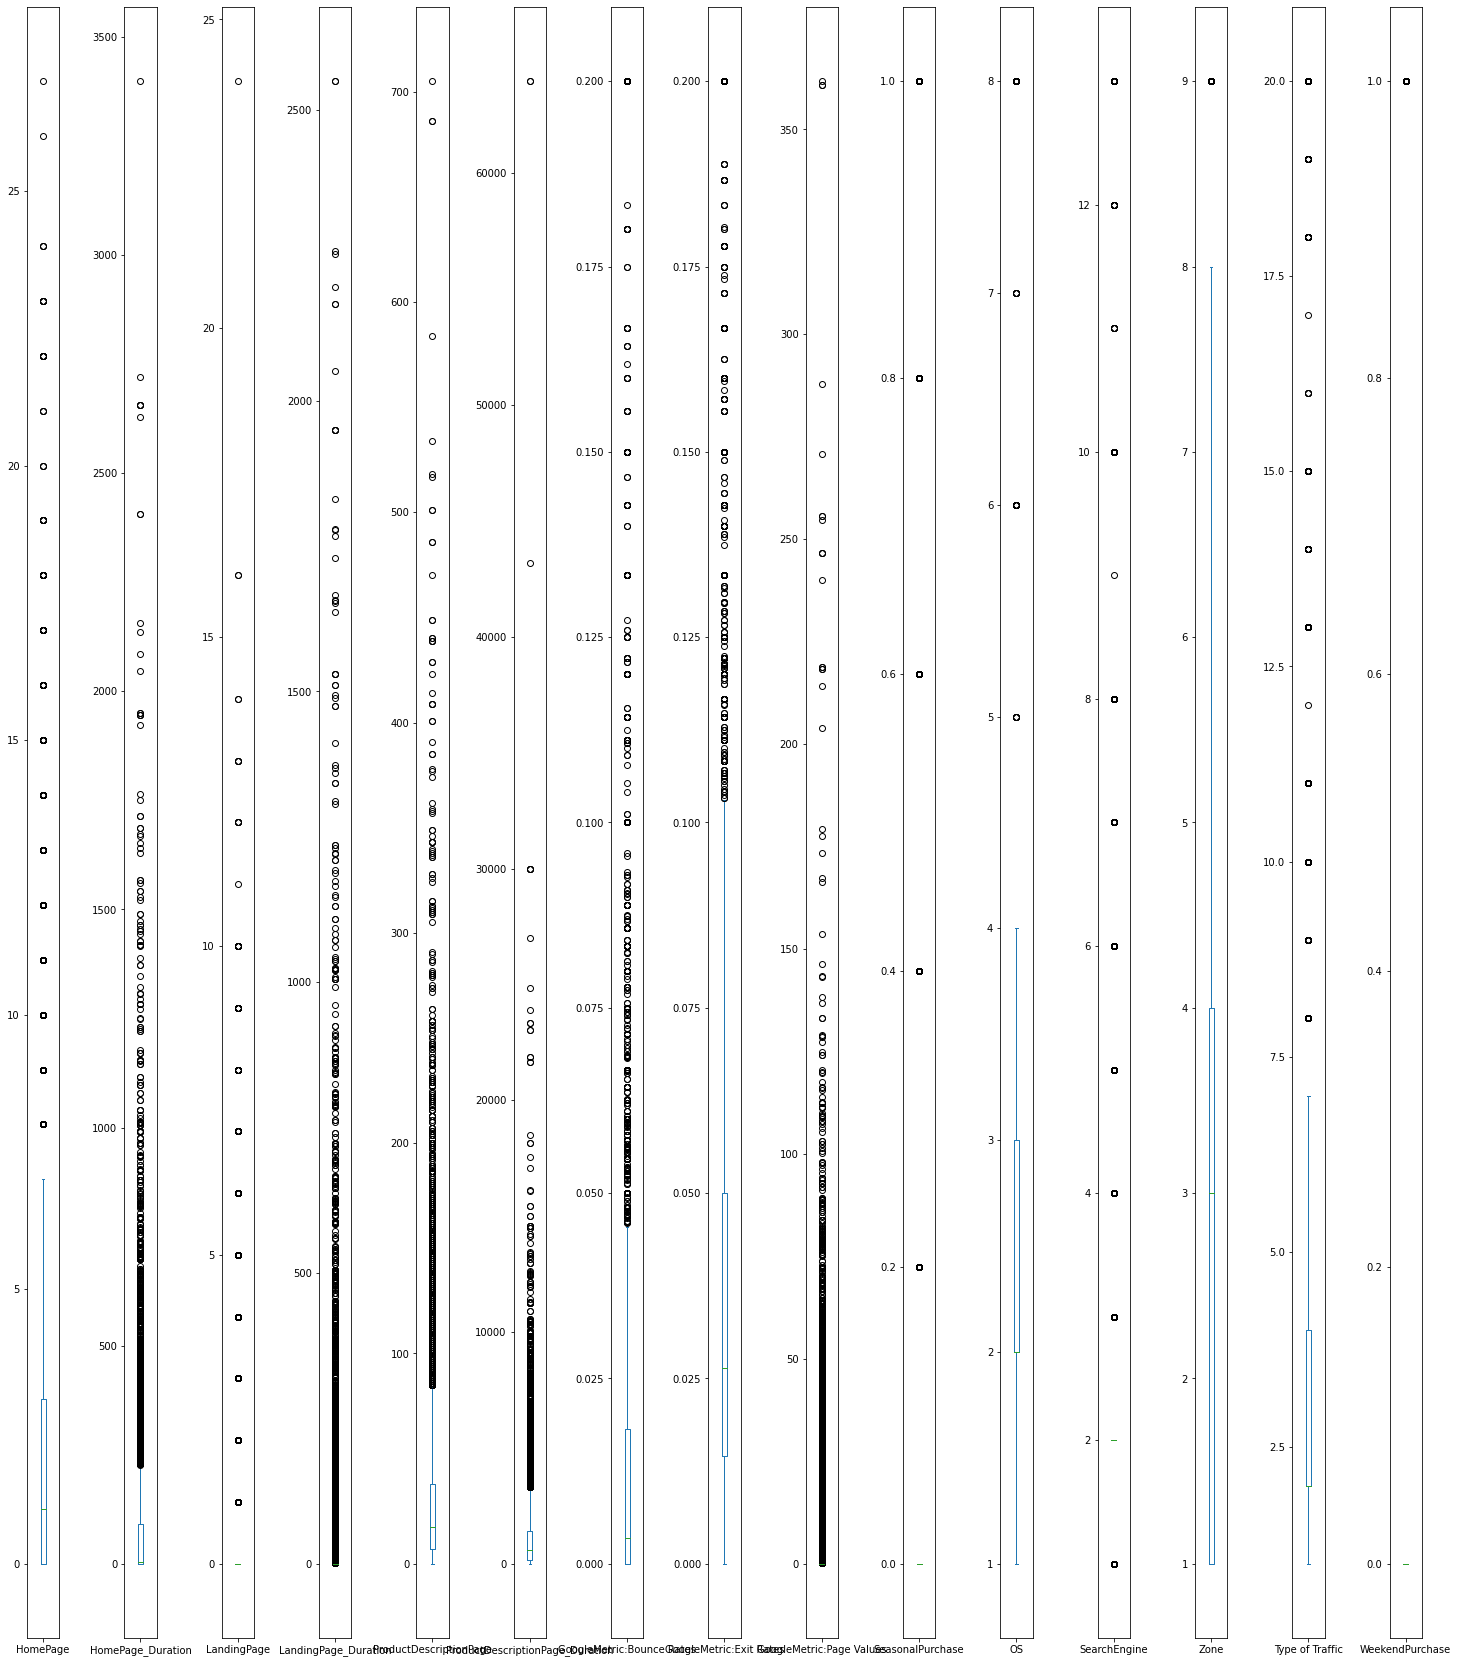

In [13]:
data[num_cols].plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(25, 30)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=2) 
plt.show()

The above boxplots for all the numerical features confirms our suspicion of extreme outliers in the dataset

## Categorical Features Exploration

In [14]:
data.describe(include='object')

,Month_SeasonalPurchase,CustomerType,Gender,Cookies Setting,Education,Marital Status
count,14587,14587,14586,14587,14595,14601
unique,10,3,3,3,4,3
top,May,Returning_Visitor,Not Specified,Deny,Others,Other
freq,4121,12550,4971,4964,3726,4952


Now we'll explore the categorical data

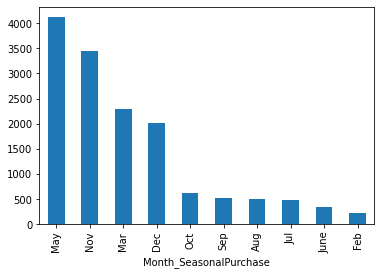

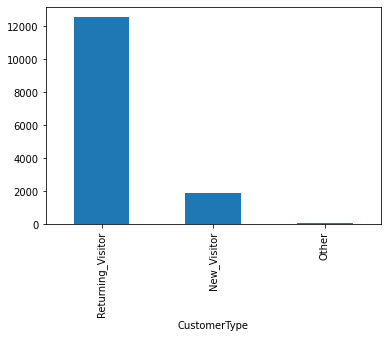

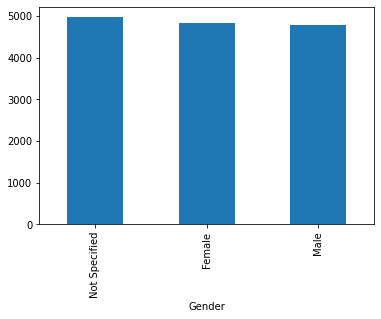

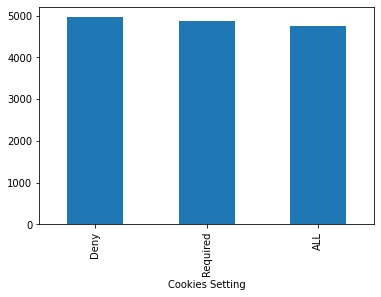

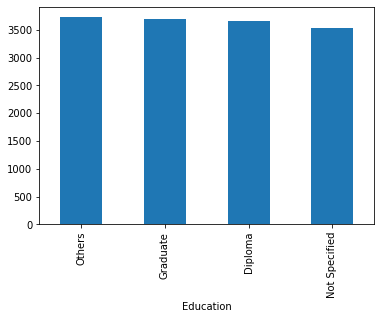

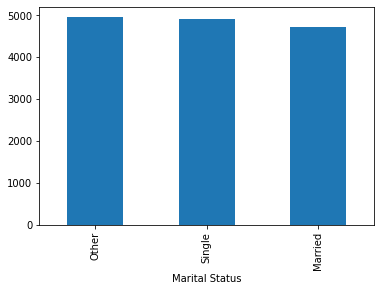

In [15]:
for i in cat_cols:
  data[i].value_counts().plot(kind='bar', xlabel=i)
  plt.show()

<AxesSubplot:xlabel='Made_Purchase'>

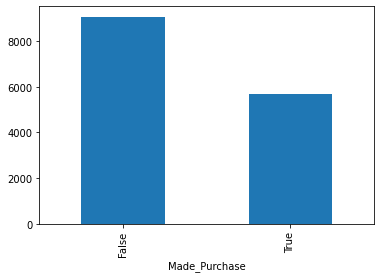

In [16]:
data['Made_Purchase'].value_counts().plot(kind='bar', xlabel='Made_Purchase')

The target variable is not balanced. An oversampling technique should be a better approach to balance the data since this is a small dataset

# Data Preprocessing

## Splitting the Data into train and test

In [17]:
X = data.iloc[:, :-1]
y = data['Made_Purchase']
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Made_Purchase, dtype: bool

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11784, 21), (11784,), (2947, 21), (2947,))

## Pipeline Generation

In [19]:
#Combining all the categorical columns and numerical columns
num_cols = [i for i in list(X_train.select_dtypes('float64').columns) if i not in cat_shown_as_num]
original_cat_cols = list(X_train.select_dtypes('object').columns)
combined_cat_cols = original_cat_cols + cat_shown_as_num

Before making the pipeline, we need to balance the data

In [20]:
#In order to apply balancing techniques, data must not contain missing values
num_impute = SimpleImputer(strategy='median')
cat_impute = SimpleImputer(strategy='most_frequent')

X_train[num_cols] = num_impute.fit_transform(X_train[num_cols])
X_train[combined_cat_cols] = cat_impute.fit_transform(X_train[combined_cat_cols])

#SMOTENC is selected as this appropriate to use when the data contains categorical features
cat_cols_index = [i for i in range(len(X_train.columns)) if X_train.columns[i] in original_cat_cols]
smote = SMOTENC(cat_cols_index, random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Three different preprocessing pipelines are prepared to handle Numerical Data, Categorical Data and Categorical Data which is shown as Numerical Data

In [21]:
num_pipeline = Pipeline([('selector', ColumnTransformer([('pass', 'passthrough', num_cols)])),
                         ('imputer', SimpleImputer(strategy='median')),
                         ('function_transform', FunctionTransformer(np.log1p))
                         ])

original_cat_pipeline = Pipeline([('selector', ColumnTransformer([('pass', 'passthrough', original_cat_cols)])),
                         ('imputer', SimpleImputer(strategy='most_frequent')),
                         ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

cat_shown_as_num_pipeline = Pipeline([('selector', ColumnTransformer([('pass', 'passthrough', cat_shown_as_num)])),
                         ('imputer', SimpleImputer(strategy='most_frequent'))])


In [22]:
data_pipe = Pipeline([('features', FeatureUnion([('num', num_pipeline),
                                                ('cat', original_cat_pipeline),
                                                ('cat_shown_as_num', cat_shown_as_num_pipeline)
                                                ])),
                     ('scaler', MinMaxScaler()),
                     ('poly', PolynomialFeatures(degree=1))])

#Model Building

In [23]:
sgd_pipe = Pipeline([('features', FeatureUnion([('num', num_pipeline),
                                                ('cat', original_cat_pipeline),
                                                ('cat_shown_as_num', cat_shown_as_num_pipeline)
                                                ])),
                     ('scaler', MinMaxScaler()),
                     ('poly', PolynomialFeatures(degree=1)),
                     ('sgd', SGDClassifier(loss='log', max_iter=10, penalty='l1',alpha=0.001,
                                               random_state=42, warm_start=True))])

sgd_pipe.fit(X_train_resampled, y_train_resampled)
f1_score(y_train_resampled, sgd_pipe.predict(X_train_resampled)), f1_score(y_test, sgd_pipe.predict(X_test))

(0.47106350995866214, 0.41958041958041964)

In [24]:
rf_pipe = Pipeline([('features', FeatureUnion([('num', num_pipeline),
                                                ('cat', original_cat_pipeline),
                                                ('cat_shown_as_num', cat_shown_as_num_pipeline)
                                                ])),
                      ('poly', PolynomialFeatures(degree=1)),
                      ('scaler', MinMaxScaler()),
                      ('rf', RandomForestClassifier(n_estimators=120, max_depth=2, max_features=0.3, max_samples=0.05))])

rf_pipe.fit(X_train_resampled, y_train_resampled)
f1_score(y_train_resampled, rf_pipe.predict(X_train_resampled)), f1_score(y_test, rf_pipe.predict(X_test))

(0.5084282460136674, 0.4223245109321058)

In [25]:
bag_pipe = Pipeline([('features', FeatureUnion([('num', num_pipeline),
                                                ('cat', original_cat_pipeline),
                                                ('cat_shown_as_num', cat_shown_as_num_pipeline)
                                                ])),
                      ('poly', PolynomialFeatures(degree=1)),
                      ('scaler', MinMaxScaler()),
                      ('bag', BaggingClassifier())])

bag_pipe.fit(X_train_resampled, y_train_resampled)
f1_score(y_train_resampled, bag_pipe.predict(X_train_resampled)), f1_score(y_test, bag_pipe.predict(X_test))

(0.8601232147857744, 0.3113163972286374)

Random Forest provids a better overall f1 score on the train and test.
This could be because since Random Forest is an ensembling technique, it performs better when exposed to outliers

#Feature Selection

In [26]:
data_pipe = Pipeline([('features', FeatureUnion([('num', num_pipeline),
                                                ('cat', original_cat_pipeline),
                                                ('cat_shown_as_num', cat_shown_as_num_pipeline)
                                                ])),
                     ('scaler', MinMaxScaler()),
                     ('poly', PolynomialFeatures(degree=1))])

sfm = SelectFromModel(rf_pipe[-1]).fit(data_pipe.fit_transform(X_train, y_train), y_train)

In [27]:
selected_cols = X_train.columns[(sfm.get_support()[:-1])]
selected_features = X_train[selected_cols]
selected_features.head()

,LandingPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase
10081,0.0,300.766667,0.004762,0.022222,0.0,0.0
4809,0.0,42.200000,0.000000,0.040000,0.0,0.0
11007,1.0,13.000000,0.000000,0.100000,0.0,0.0
2168,0.0,2665.798039,0.007143,0.027289,0.0,0.8
7417,0.0,4894.851299,0.002683,0.028447,0.0,0.0


In [28]:
selected_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('function_transform', FunctionTransformer(np.log1p)),
                          ('poly', PolynomialFeatures(degree=1)), 
                         ('scaler', MinMaxScaler()),
                         ('rf', RandomForestClassifier(n_estimators=120, max_depth=2, 
                                                       max_features=0.3, max_samples=0.05))])
selected_pipe.fit(selected_features, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('function_transform',
                 FunctionTransformer(func=<ufunc 'log1p'>)),
                ('poly', PolynomialFeatures(degree=1)),
                ('scaler', MinMaxScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=2, max_features=0.3,
                                        max_samples=0.05, n_estimators=120))])

# Hyperparameter Tuning

In [29]:
params = {'poly__degree': [1,2,3],
          'rf__n_estimators':[80,120,140],
          'rf__max_depth': [3,6,8,10],
          'rf__max_samples': [0.4,0.6,0.8],
          'rf__max_features': [0.6,0.8,1]}

gscv = GridSearchCV(selected_pipe, param_grid=params, scoring='f1', 
                    cv=5, 
                    return_train_score=True, error_score='raise', n_jobs=-1)
# gscv.fit(X_train_resampled[selected_cols], y_train_resampled)

In [30]:
# gscv.best_params_, gscv.best_score_

In [31]:
# selected_pipe = gscv.best_estimator_

# Predicting the Test Data

In [32]:
test_data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

In [33]:
test_selected_features = test_data[selected_cols]
test_hat = selected_pipe.predict(test_selected_features)

In [34]:
submission=pd.DataFrame(columns=['id', 'Made_Purchase'])
submission['id']=[i for i in range(len(test_hat))]
submission["Made_Purchase"]=test_hat
submission.to_csv('submission.csv',index=False)